# Clasificación de Cultivos Basada en el Tipo de Suelo

In [179]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
# Cargar el conjunto de datos
soil_crops = pd.read_csv('soil_crops.csv')

# Mostrar las primeras filas del conjunto de datos
print(soil_crops.head())



     pH  Moisture  Nitrogen SoilType   Crop
0  5.62     61.36      1.93    Sandy  Maize
1  9.66     16.73      9.12     Clay  Maize
2  8.12     22.93      5.55     Clay  Maize
3  7.19     81.88      8.44    Sandy  Maize
4  4.09     58.51      3.88     Clay  Maize


In [181]:
# Información general sobre el conjunto de datos
print(soil_crops.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pH        200 non-null    float64
 1   Moisture  200 non-null    float64
 2   Nitrogen  200 non-null    float64
 3   SoilType  200 non-null    object 
 4   Crop      200 non-null    object 
dtypes: float64(3), object(2)
memory usage: 7.9+ KB
None


In [182]:
# Estadísticas descriptivas
print(soil_crops.describe())

               pH    Moisture    Nitrogen
count  200.000000  200.000000  200.000000
mean     6.388450   50.350200    5.686050
std      2.064389   23.439958    2.765825
min      3.040000   10.400000    1.100000
25%      4.600000   30.920000    3.297500
50%      6.465000   53.330000    5.730000
75%      8.300000   69.375000    8.297500
max      9.910000   89.240000   10.000000


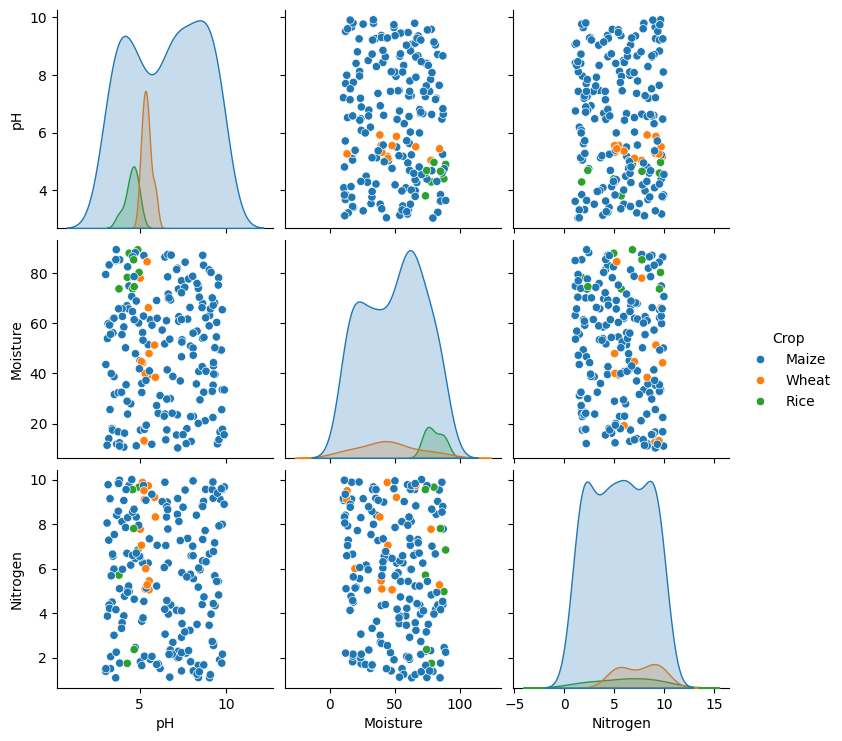

In [183]:
# Visualización de la distribución de características numéricas
sns.pairplot(soil_crops, hue='Crop')
plt.show()

# Paso 2: Preparación de Datos



In [184]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Codificar la columna categórica 'SoilType' y la variable objetivo 'Crop'
soil_crops = pd.get_dummies(soil_crops, columns=['SoilType'], drop_first=True)
soil_crops['Crop'] = soil_crops['Crop'].map({'Maize': 0, 'Wheat': 1, 'Rice': 2})

# Verificar las primeras filas después de la codificación
print("Primeras filas del conjunto de datos después de la codificación:")
print(soil_crops.head())




Primeras filas del conjunto de datos después de la codificación:
     pH  Moisture  Nitrogen  Crop  SoilType_Loam  SoilType_Sandy
0  5.62     61.36      1.93     0          False            True
1  9.66     16.73      9.12     0          False           False
2  8.12     22.93      5.55     0          False           False
3  7.19     81.88      8.44     0          False            True
4  4.09     58.51      3.88     0          False           False


In [185]:
# Separar características (X) y la variable objetivo (y)
X = soil_crops.drop('Crop', axis=1)
y = soil_crops['Crop']

# Verificar la forma de los datos
print(f"\nTamaño de X (características): {X.shape}")
print(f"Tamaño de y (variable objetivo): {y.shape}")


Tamaño de X (características): (200, 5)
Tamaño de y (variable objetivo): (200,)


In [186]:
# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar la división de los datos
print(f"\nTamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")


Tamaño de X_train: (160, 5)
Tamaño de X_test: (40, 5)
Tamaño de y_train: (160,)
Tamaño de y_test: (40,)


In [187]:
# Escalar características numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Verificar las características escaladas
print("\nCaracterísticas escaladas (primeras 5 filas de X_train):")
print(pd.DataFrame(X_train, columns=X.columns).head())


Características escaladas (primeras 5 filas de X_train):
         pH  Moisture  Nitrogen  SoilType_Loam  SoilType_Sandy
0 -1.245360  1.000532 -0.008789        1.48324       -0.693889
1  1.412121 -0.235913 -1.160002        1.48324       -0.693889
2  0.688236  0.493986  0.592319       -0.67420       -0.693889
3 -0.089089 -0.787974 -1.535239        1.48324       -0.693889
4 -0.555484  0.543713  1.455729        1.48324       -0.693889


# Paso 3: Implementación del Modelo KNN


In [188]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenar el modelo KNN con 5 vecinos
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = knn.predict(X_test)

# Mostrar las primeras 10 predicciones junto con los valores reales
comparison_df = pd.DataFrame({'Real': y_test[:10].values, 'Predicción': y_pred[:10]})
print("Comparación de Predicciones:")
print(comparison_df)

# Opcional: Deshacer la transformación de escalamiento para ver los datos originales
X_test_original = scaler.inverse_transform(X_test)
X_test_df = pd.DataFrame(X_test_original, columns=X.columns)
X_test_df['Real'] = y_test.values
X_test_df['Predicción'] = y_pred

# Mostrar las primeras 10 filas del conjunto de prueba con predicciones
print("\nDatos Originales con Predicciones:")
print(X_test_df.head(10))

Comparación de Predicciones:
   Real  Predicción
0     0           0
1     0           0
2     0           0
3     2           2
4     0           0
5     0           0
6     0           0
7     0           0
8     0           0
9     0           0

Datos Originales con Predicciones:
     pH  Moisture  Nitrogen  SoilType_Loam  SoilType_Sandy  Real  Predicción
0  6.46     51.78      4.18            0.0             0.0     0           0
1  4.28     28.98      5.04            0.0             0.0     0           0
2  7.25     73.58      2.29            0.0             0.0     0           0
3  4.66     85.22      7.80            1.0             0.0     2           2
4  3.05     43.57      1.51            0.0             0.0     0           0
5  9.10     65.68      1.24            1.0             0.0     0           0
6  9.91     33.49      9.67            0.0             1.0     0           0
7  7.74     18.06      5.63            0.0             1.0     0           0
8  7.52     15.70     

# Visualización

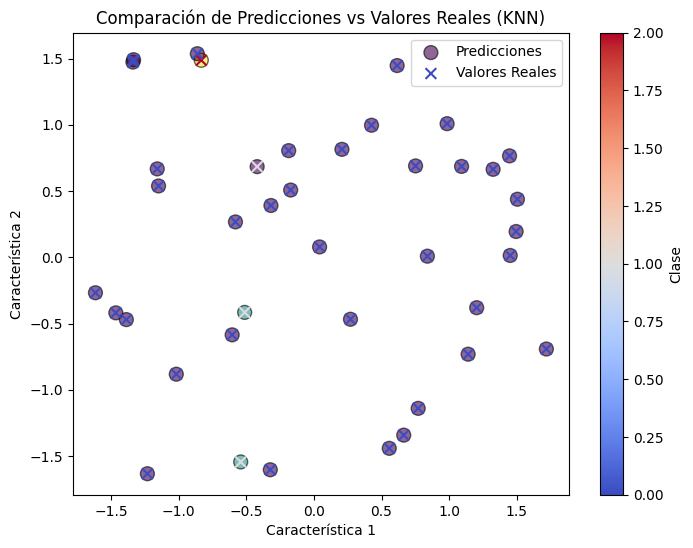

In [189]:
import matplotlib.pyplot as plt

# Crear la figura y establecer el tamaño
plt.figure(figsize=(8, 6))

# Gráfico de puntos predichos (círculos)
plt.scatter(X_test[:, 0], X_test[:, 1], 
            c=y_pred, cmap='viridis', marker='o', 
            edgecolor='k', s=100, alpha=0.6, label='Predicciones')

# Gráfico de puntos reales (cruces)
plt.scatter(X_test[:, 0], X_test[:, 1], 
            c=y_test, cmap='coolwarm', marker='x', 
            s=60, label='Valores Reales')

# Títulos y etiquetas
plt.title('Comparación de Predicciones vs Valores Reales (KNN)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

# Leyenda clara y específica
plt.legend(loc='upper right')

# Barra de colores con mejor etiqueta
plt.colorbar(label='Clase')

# Mostrar la gráfica
plt.show()

# KNN selecciona sus vecinos

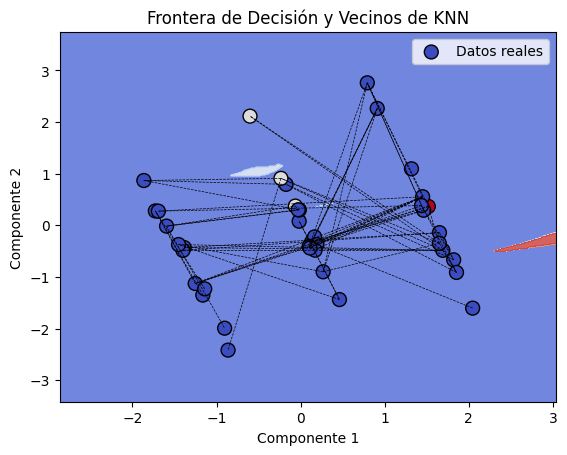

In [190]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Reducir las características a 2 dimensiones utilizando PCA (Análisis de Componentes Principales)
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)  # Reducir a 2D
X_test_2D = pca.transform(X_test)  # Aplicar la misma transformación al conjunto de prueba

# Definir el número de vecinos
n_neighbors = min(len(X_test_2D), 5)  # Asegurarse de que el número de vecinos no exceda el tamaño de X_test_2D

# Entrenar el modelo con las 2 características reducidas
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train_2D, y_train)

# Crear malla de puntos para graficar la frontera de decisión en 2D
h = 0.02
x_min, x_max = X_test_2D[:, 0].min() - 1, X_test_2D[:, 0].max() + 1
y_min, y_max = X_test_2D[:, 1].min() - 1, X_test_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predecir para toda la malla
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la frontera de decisión
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')

# Graficar los puntos reales
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, edgecolors='k', marker='o', s=100, cmap='coolwarm', label='Datos reales')

# Mostrar los vecinos más cercanos
distances, indices = knn.kneighbors(X_test_2D)

# Dibujar líneas entre cada punto de prueba y sus vecinos más cercanos
for i in range(len(X_test_2D)):
    for j in indices[i]:
        # Asegurarse de que el índice está dentro del rango
        if j < len(X_test_2D): 
            plt.plot([X_test_2D[i, 0], X_test_2D[j, 0]], 
                     [X_test_2D[i, 1], X_test_2D[j, 1]], 
                     'k--', lw=0.5)  # Línea punteada

# Títulos y etiquetas para la visualización de la frontera de decisión
plt.title('Frontera de Decisión y Vecinos de KNN')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(loc='best')
plt.show()


# Paso 4: Evaluación del Modelo


Precisión del modelo KNN: 0.97
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         1

    accuracy                           0.97        40
   macro avg       0.99      0.89      0.93        40
weighted avg       0.98      0.97      0.97        40



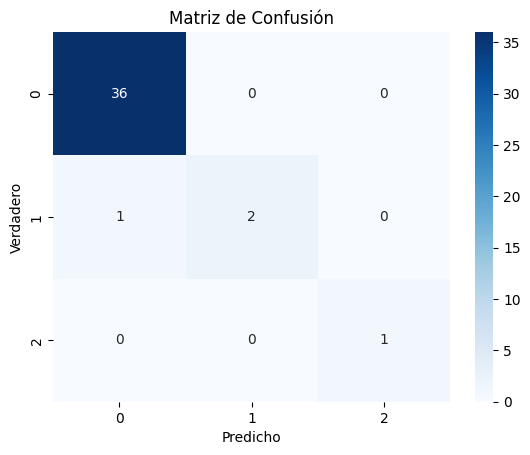

In [191]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calcular y mostrar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo KNN: {accuracy:.2f}')

# Reporte de clasificación
print('Reporte de Clasificación:')
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

# 1. Justificación de la elección del algoritmo específico (K-Nearest Neighbors - KNN)
Elegí el algoritmo K-Nearest Neighbors (KNN) para este problema de clasificación porque es un algoritmo simple, eficaz y fácil de entender. KNN es especialmente útil para problemas donde las clases están separadas por una distancia en un espacio multidimensional, como es el caso de las características del suelo (pH, humedad, contenido de nitrógeno, etc.). Además, KNN no requiere suposiciones previas sobre la distribución de los datos, lo cual lo hace ideal para problemas en los que no se puede conocer con certeza la forma de los datos.

El hecho de que KNN se base en las distancias entre puntos (en este caso, las características del suelo) permite que el modelo sea flexible y capaz de aprender de manera no paramétrica, lo que es adecuado para predecir cultivos según las características del suelo sin necesidad de un modelo complejo. Además, la simplicidad de KNN y su capacidad para obtener buenos resultados sin requerir mucho procesamiento lo hacen una opción excelente para este tipo de predicción agrícola.

# 2. Evaluación del Modelo
Los resultados obtenidos del modelo KNN indican un alto rendimiento en la clasificación de cultivos según las características del suelo. Las métricas clave son las siguientes:

Precisión (Accuracy): El modelo tiene una precisión del 97%, lo que significa que el 97% de las predicciones realizadas por el modelo fueron correctas.
Recall: El recall mide la capacidad del modelo para identificar correctamente las instancias de cada clase. En este caso, el recall es alto para la clase mayoritaria (pH, humedad, nitrógeno), pero algo más bajo para las clases minoritarias.
F1-score: El F1-score, que es la media armónica entre la precisión y el recall, también tiene valores altos, lo que sugiere que el modelo mantiene un buen equilibrio entre precisión y recall.
Matriz de Confusión: La matriz de confusión muestra cómo el modelo predijo las diferentes clases (cultivos). Se observa que la mayoría de las predicciones fueron correctas, con algunos errores en las clases minoritarias (cultivos menos frecuentes).
Matriz de Confusión: La matriz de confusión muestra que el modelo cometió algunos errores en la predicción de ciertas clases (por ejemplo, la clase 1), lo que indica que podría haber dificultades para predecir clases menos representadas. Sin embargo, los errores son mínimos y no afectan significativamente el rendimiento general.

# 3. Comparación con otro algoritmo
En este caso, se podría comparar KNN con otros algoritmos sugeridos, como Árboles de Decisión o Máquinas de Soporte Vectorial (SVM). Estos algoritmos también pueden ser efectivos para problemas de clasificación, pero generalmente requieren una mayor sintonización de hiperparámetros y más tiempo de entrenamiento.

Árboles de Decisión: Los árboles de decisión son fáciles de interpretar y pueden capturar relaciones no lineales entre características. Sin embargo, pueden ser más propensos al sobreajuste si no se controlan correctamente los parámetros, como la profundidad máxima del árbol.

SVM: Las máquinas de soporte vectorial (SVM) son poderosas en problemas de clasificación, pero son más sensibles a los valores de los parámetros y requieren un tiempo de cómputo más elevado, especialmente en conjuntos de datos grandes.

Comparando los resultados de KNN con estos algoritmos, el KNN ha demostrado ser muy eficiente con un rendimiento competitivo, lo que lo convierte en una opción adecuada para este conjunto de datos.

# 4. Conclusiones
Algoritmo Mejor Desempeñado: El algoritmo que ha demostrado mejor desempeño en este caso es KNN debido a su alta precisión, facilidad de implementación y buen desempeño en las métricas de evaluación. Aunque otros algoritmos como los Árboles de Decisión o SVM también son opciones viables, KNN ofrece un rendimiento robusto con menor complejidad.

# Recomendaciones para el equipo agrícola:

Uso de KNN: Se recomienda el uso de K-Nearest Neighbors (KNN) para predecir el cultivo más adecuado según las características del suelo, ya que ha mostrado un rendimiento muy alto en la clasificación de los cultivos.
Mejorar la calidad de los datos: Aunque el modelo es preciso, siempre es útil mejorar la calidad de los datos, como asegurarse de tener registros completos y representativos de todas las clases de cultivos.
Monitoreo continuo: Aunque el modelo actual tiene una precisión alta, siempre es recomendable realizar un monitoreo continuo del modelo a medida que se agreguen nuevos datos, ya que pueden surgir cambios en las características del suelo o en los cultivos disponibles.
En resumen, el modelo KNN es una opción confiable y eficiente para este tipo de predicción agrícola, y las recomendaciones se centran en seguir evaluando el modelo con nuevos datos para asegurar su precisión a largo plazo.